# Simulation of Process Drift

## Setup

In [126]:
import numpy as np
import math
import random
import process_simulation
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from scipy import stats

Global settings

In [62]:
load_results_from_path = True

## Replication of Results by Pentland

First simulation with static parameter settings

In [66]:
### simulation parameters
n = 5000 # number of time steps
l = 300 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 100 # size of the history matrix

v = 0.01 # chance of variation

max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.

In [67]:
my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)

In [68]:
adjacency_matrices = my_simulation.run_simulation(record_am=range(0, n, 10))

In [69]:
results_df = process_simulation.summarize_sim_results(adjacency_matrices)
results_df.head()

,number of nodes,number of connected nodes,number of edges,average degree,control flow complexity,depth,density,est. count shortest simple paths
time,,,,,,,,
0,300.0,300.0,299.0,0.996667,298.0,300.0,0.003333,1.000000e+00
10,300.0,300.0,323.0,1.076667,298.0,133.0,0.003601,8.317638e+01
20,300.0,300.0,353.0,1.176667,298.0,56.0,0.003935,2.089296e+04
30,300.0,300.0,378.0,1.260000,298.0,41.0,0.004214,2.089296e+06
40,300.0,300.0,407.0,1.356667,299.0,35.0,0.004537,4.365158e+08


## Comparisson of Complexity metrics

In [77]:
results_df_norm = pd.DataFrame()

# normalize all complexity metrics to plot them in one graph and observe their differences
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in results_df.columns:
    results_df_norm[col] = absolute_maximum_scale(results_df[col])

# drop the number of nodes column
results_df_norm = results_df_norm.drop(columns=['number of nodes', 'control flow complexity'])

# only show a few timestamps
# print(results_df_norm.iloc[::5].to_latex())
results_df_norm.iloc[::100]

,number of connected nodes,number of edges,average degree,depth,density,est. count shortest simple paths
time,,,,,,
0,1.000000,0.233959,0.233179,1.000000,0.131206,3.981072e-79
1000,1.000000,0.822379,0.819637,0.060000,0.461195,5.754399e-19
2000,0.986667,0.915493,0.924772,0.050000,0.527407,3.981072e-09
3000,0.700000,0.482003,0.686281,0.013333,0.552445,1.445440e-46
4000,0.456667,0.253521,0.553305,0.013333,0.684478,4.365158e-64


In [78]:
results_df_norm.corr()

,number of connected nodes,number of edges,average degree,depth,density,est. count shortest simple paths
number of connected nodes,1.000000,0.915663,0.772647,0.411513,-0.786859,0.078844
number of edges,0.915663,1.000000,0.956459,0.222698,-0.502099,0.131641
average degree,0.772647,0.956459,1.000000,0.048803,-0.282495,0.148422
depth,0.411513,0.222698,0.048803,1.000000,-0.488534,0.020944
density,-0.786859,-0.502099,-0.282495,-0.488534,1.000000,0.014912
est. count shortest simple paths,0.078844,0.131641,0.148422,0.020944,0.014912,1.000000


<Figure size 432x288 with 0 Axes>

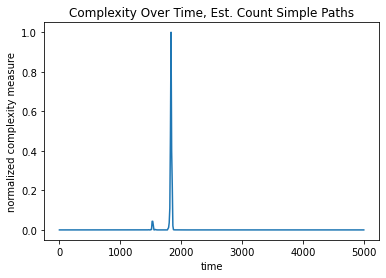

In [79]:
f = plt.figure()
ax = results_df_norm[['est. count shortest simple paths']].plot(title="Complexity Over Time, Est. Count Simple Paths")
ax.set_ylabel("normalized complexity measure")
ax.get_legend().remove()
plt.savefig('experiment_results/plot_complexity_simple paths.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 432x288 with 0 Axes>

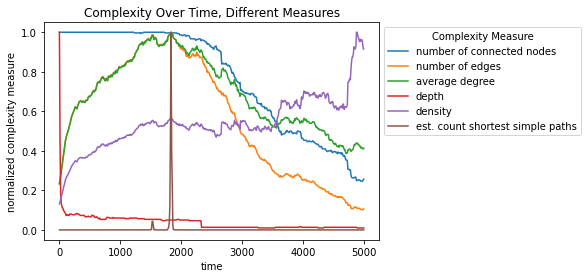

In [80]:
f = plt.figure()
ax = results_df_norm.plot(title="Complexity Over Time, Different Measures")
ax.set_ylabel("normalized complexity measure")
legend = plt.legend(title='Complexity Measure', bbox_to_anchor=(1.0, 1.0))
plt.savefig('experiment_results/plot_complexity_measures.png', dpi=300, bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='time'>

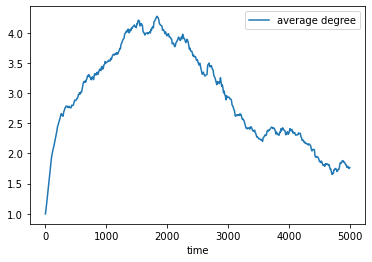

In [81]:
results_df.plot(y='average degree')

<AxesSubplot:xlabel='time'>

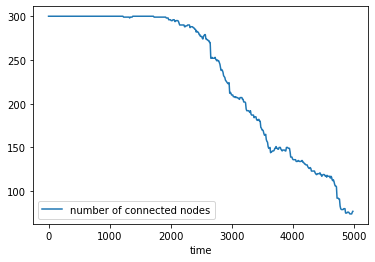

In [82]:
results_df.plot(y='number of connected nodes')

## Plot some graphs at different times    

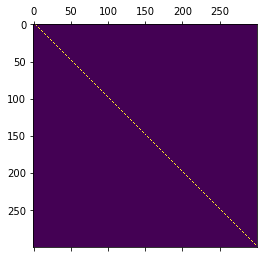

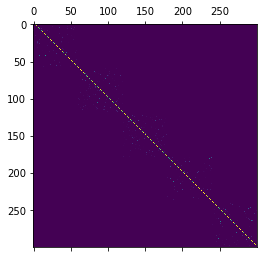

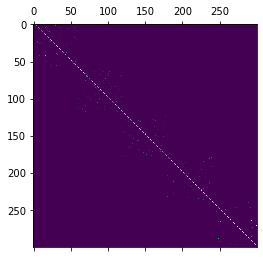

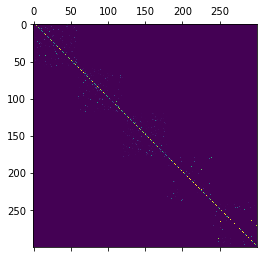

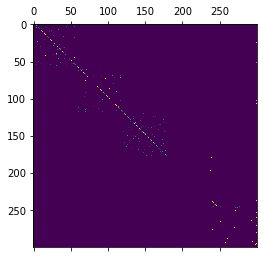

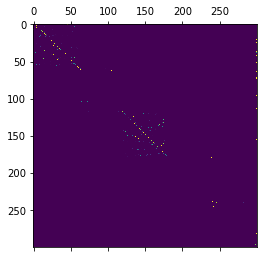

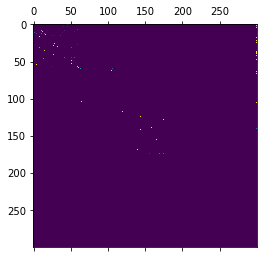

In [83]:
plot_matrixes = [0, 1000, 1500, 2000, 3000, 4000, 4990]
for time, adjacency_matrix in adjacency_matrices.items():
    if time in plot_matrixes:
        # get the graph object
        # graph = nx.from_numpy_matrix(adjacency_matrix)
        # plt.figure(time)
        # nx.draw_kamada_kawai(graph)
        plt.matshow(adjacency_matrix)

In [14]:
%%script false --no-raise-error

### simulation parameters
n = 400 # number of time steps
ls = [100, 300 # 400] # lexicon: number of different process steps
ms = [1, 5, 20] #10, 20] # number of subunits of the process, needs to be a factor of l
rs = [0, 100, 200] #100, 150, 200] # size of the history matrix
vs = [0.001, 0.1] # 0.005, 0.01] # chance of variation

all_results_list = []
for l in ls:
    max_sequence_length = 100 * l # cut-off sequences longer than this value to avoid infinite loops.
    for m in ms:
        for r in rs:
            for v in vs:
                my_simulation = process_simulation.ProcessSimulationPentland(n, l, m, r, v, max_sequence_length)
                adjacency_matrices = my_simulation.run_simulation(record_am=range(1,n+1))
                result_df = process_simulation.summarize_sim_results(adjacency_matrices)
                result_row = result_df.mean(axis=0)

                result = {}
                result['l'] = l
                result['m'] = m
                result['r'] = r
                result['v'] = v
                
                result = result | result_row.to_dict()
                all_results_list.append(result)
      
results_df = pd.DataFrame(all_results_list)
display(results_df)
display(results_df[['l', 'm', 'r', 'v', 'est. count shortest simple paths']])

Couldn't find program: 'false'


# Extension of the Pentland simulation

For all analyses consider
n = 1000
l = 100
m = 1
r = 50
max_sequence_length = 100 * l

Szenarios to analyze:
1. Impact of degree of automation to process complexity behavior. Investigate a between 0 and 1 in 0.1 steps.
1. Fully automized process with some non-standard case input

### Impact of Degree of Automation
#### RQ1.1

In [84]:
### simulation parameters
## fixed
n = 5000 # number of time steps
l = 200 # lexicon: number of different process steps
m = 5 # number of subunits of the process, needs to be a factor of l
r = 50 # size of the history matrix

max_sequence_length = l * 100 # cut-off sequences longer than this value to avoid infinite loops.

# extended parameters

v_h = 0.005 # chance of variation for a human actor
v_a = 0.0001 # chance of variation for an automized activity

i = 0 # percentage of non-standard case input
v_h_i = v_h # chance of variation for a human actor if process input is non-standard
v_a_i = v_a # chance of variation if automized activity if process input is non-standard

complexity_measure = 'Average Degree'

# TODO set for final experiment
runs_per_experiment = 10 # number of runs for each experiment
experiments = 10

a_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of activities that are automated

In [85]:
a_results_path = os.path.join('experiment_results', 'results_a_values.pkl')

simulation_results = []
if load_results_from_path:
    with open(a_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for a in a_values:
        print(a)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(a_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [86]:
simulation_results[0]

number of nodes  number of connected nodes  number of edges  \
run time                                                                
0   0               200.0                      200.0            199.0   
    50              200.0                      200.0            250.0   
    100             200.0                      200.0            270.0   
    150             200.0                      200.0            315.0   
    200             200.0                      200.0            296.0   
...                   ...                        ...              ...   
9   4750            200.0                        6.0              7.0   
    4800            200.0                        6.0              7.0   
    4850            200.0                        6.0              7.0   
    4900            200.0                        7.0              9.0   
    4950            200.0                        6.0              7.0   

          average degree  control flow complexity  depth   density  \
run time                                                             
0   0           0.995000                    198.0  200.0  0.005000   
    50          1.250000                    200.0   12.0  0.006281   
    100         1.350000                    199.0    8.0  0.006784   
    150         1.575000                    200.0    6.0  0.007915   
    200         1.480000                    199.0    9.0  0.007437   
...                  ...                      ...    ...       ...   
9   4750        1.166667                      6.0    3.0  0.233333   
    4800        1.166667                      6.0    3.0  0.233333   
    4850        1.166667                      6.0    3.0  0.233333   
    4900        1.285714                      7.0    3.0  0.214286   
    4950        1.166667                      6.0    3.0  0.233333   

          est. count shortest simple paths  
run time                                    
0   0                         1.000000e+00  
    50                        1.202264e+04  
    100                       4.786301e+05  
    150                       1.905461e+09  
    200                       5.754399e+07  
...                                    ...  
9   4750                      1.445440e+00  
    4800                      1.445440e+00  
    4850                      1.445440e+00  
    4900                      1.737801e+00  
    4950                      1.445440e+00  

[1000 rows x 8 columns]

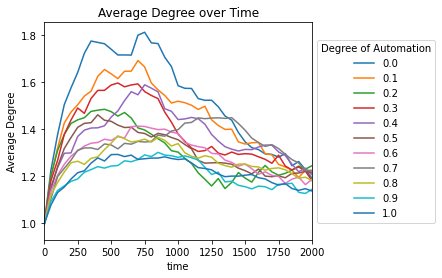

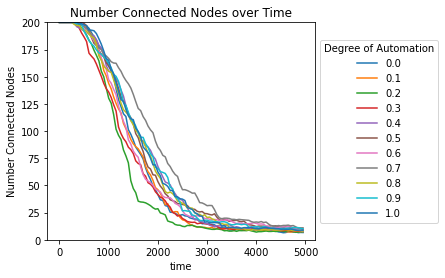

In [110]:
avg_simulation_results = [simulation_result.groupby(level=1).mean() for simulation_result in simulation_results]

# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = complexity_measure.lower(),ax = ax, label = a_value)
ax.set_ylabel(complexity_measure)
ax.set_xlim(0, 2000)
ax.set_title(f"{complexity_measure} over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Degree of Automation')

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = 'number of connected nodes', ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Degree of Automation')

pass

In [112]:
time_to_measure = 250

results_list =  []
# compute the speed of growth for the complexity measure until time x
for a_value, simulation_result in zip(a_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        initial_complexity = simulation_result.loc[(run, 0)][complexity_measure.lower()]
        complexities_after_time = simulation_result.loc[(run, time_to_measure)][complexity_measure.lower()]
        change_of_complexity = complexities_after_time - initial_complexity
        speed_of_change = change_of_complexity / time_to_measure
        
        results_list.append((a_value, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['degree of automation', 'speed to complexity'])
automation_speed_df

,degree of automation,speed to complexity
0,0.0,0.00212
1,0.0,0.00224
2,0.0,0.00248
3,0.0,0.00278
4,0.0,0.00216
...,...,...
105,1.0,0.00120
106,1.0,0.00078
107,1.0,0.00082
108,1.0,0.00078


<AxesSubplot:title={'center':'RQ1.1 Degree of Automation and Speed to Complexity'}, xlabel='degree of automation', ylabel='speed to complexity'>

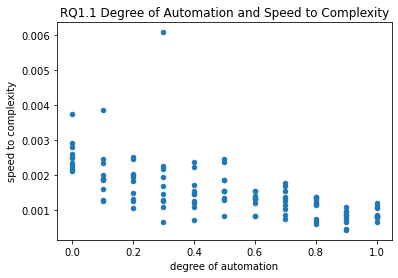

In [135]:
automation_speed_df.plot.scatter(x='degree of automation', y='speed to complexity', title='RQ1.1 Degree of Automation and Speed to Complexity')

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

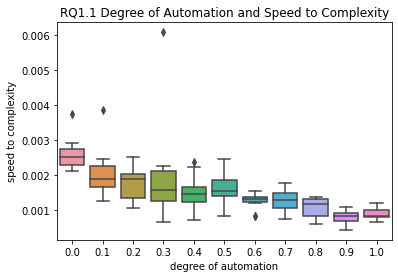

In [143]:
sns.boxplot( x=automation_speed_df['degree of automation'], y=automation_speed_df['speed to complexity'])
plt.title('RQ1.1 Degree of Automation and Speed to Complexity')
plt.show()

In [125]:
stats.spearmanr(automation_speed_df['degree of automation'], automation_speed_df['speed to complexity'], alternative='less')

SpearmanrResult(correlation=-0.7360739744966671, pvalue=2.5687224153891858e-20)

#### RQ1.2

In [146]:
results_list =  []
# compute the speed of growth for the complexity measure until time x
for a_value, simulation_result in zip(a_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        max_complexity = max(simulation_result.loc[(run, )][complexity_measure.lower()])
        results_list.append((a_value, max_complexity))

automation_max_complexity_df = pd.DataFrame(results_list, columns=['degree of automation', 'max complexity'])
automation_max_complexity_df

,degree of automation,max complexity
0,0.0,1.662651
1,0.0,3.075000
2,0.0,3.060000
3,0.0,2.585000
4,0.0,1.681250
...,...,...
105,1.0,1.315000
106,1.0,1.470588
107,1.0,1.333333
108,1.0,1.370558


<AxesSubplot:title={'center':'RQ1.1 Degree of Automation and Max Complexity'}, xlabel='degree of automation', ylabel='max complexity'>

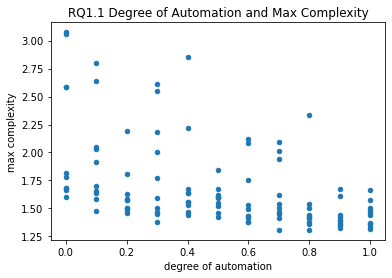

In [149]:
automation_max_complexity_df.plot.scatter(x='degree of automation', y='max complexity', title='RQ1.1 Degree of Automation and Max Complexity')

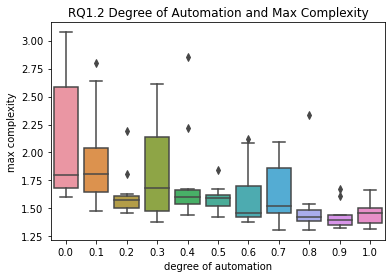

In [150]:
sns.boxplot( x=automation_max_complexity_df['degree of automation'], y=automation_max_complexity_df['max complexity'])
plt.title('RQ1.2 Degree of Automation and Max Complexity')
plt.show()

In [151]:
stats.spearmanr(automation_max_complexity_df['degree of automation'], automation_max_complexity_df['max complexity'], alternative='less')

SpearmanrResult(correlation=-0.5880217577008211, pvalue=7.179263817224358e-12)

### RQ2 with a = 0.5

In [187]:
v_h_i = 0.01 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.03 # chance of variation if automized activity if process input is non-standard

a = 0.5
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [188]:
i_results_path = os.path.join('experiment_results', f'results_i_values_a_{str(int(a * 100)).zfill(3)}.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [189]:
simulation_results[0]

number of nodes  number of connected nodes  number of edges  \
run time                                                                
0   0               200.0                      200.0            199.0   
    50              200.0                      200.0            246.0   
    100             200.0                      200.0            259.0   
    150             200.0                      200.0            253.0   
    200             200.0                      200.0            256.0   
...                   ...                        ...              ...   
9   4750            200.0                        6.0              7.0   
    4800            200.0                        6.0              7.0   
    4850            200.0                        6.0              7.0   
    4900            200.0                        5.0              5.0   
    4950            200.0                        5.0              5.0   

          average degree  control flow complexity  depth   density  \
run time                                                             
0   0           0.995000                    198.0  200.0  0.005000   
    50          1.230000                    198.0   29.0  0.006181   
    100         1.295000                    198.0   16.0  0.006508   
    150         1.265000                    198.0   12.0  0.006357   
    200         1.280000                    198.0   12.0  0.006432   
...                  ...                      ...    ...       ...   
9   4750        1.166667                      6.0    3.0  0.233333   
    4800        1.166667                      6.0    3.0  0.233333   
    4850        1.166667                      6.0    3.0  0.233333   
    4900        1.000000                      5.0    3.0  0.250000   
    4950        1.000000                      5.0    3.0  0.250000   

          est. count shortest simple paths  
run time                                    
0   0                             1.000000  
    50                         5754.399373  
    100                       63095.734448  
    150                       20892.961309  
    200                       36307.805477  
...                                    ...  
9   4750                          1.445440  
    4800                          1.445440  
    4850                          1.445440  
    4900                          1.202264  
    4950                          1.202264  

[1000 rows x 8 columns]

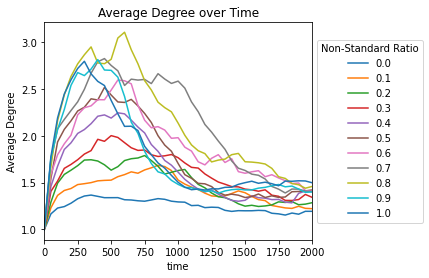

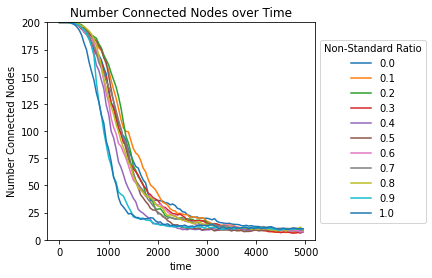

In [160]:
avg_simulation_results = [simulation_result.groupby(level=1).mean() for simulation_result in simulation_results]

# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = complexity_measure.lower(),ax = ax, label = a_value)
ax.set_ylabel(complexity_measure)
ax.set_xlim(0, 2000)
ax.set_title(f"{complexity_measure} over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = 'number of connected nodes', ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

pass

#### RQ2.1

In [164]:
time_to_measure = 250

results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        initial_complexity = simulation_result.loc[(run, 0)][complexity_measure.lower()]
        complexities_after_time = simulation_result.loc[(run, time_to_measure)][complexity_measure.lower()]
        change_of_complexity = complexities_after_time - initial_complexity
        speed_of_change = change_of_complexity / time_to_measure
        
        results_list.append((i_value, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'speed to complexity'])
automation_speed_df

,non-standard ratio,speed to complexity
0,0.0,0.000900
1,0.0,0.002960
2,0.0,0.000820
3,0.0,0.001440
4,0.0,0.001600
...,...,...
105,1.0,0.005820
106,1.0,0.008060
107,1.0,0.006200
108,1.0,0.007960


<AxesSubplot:title={'center':'RQ2.1 Non-Standard Ratio and Speed to Complexity'}, xlabel='non-standard ratio', ylabel='speed to complexity'>

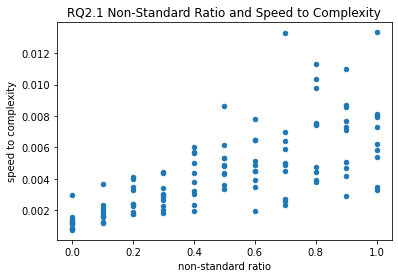

In [166]:
automation_speed_df.plot.scatter(x='non-standard ratio', y='speed to complexity', title='RQ2.1 Non-Standard Ratio and Speed to Complexity')

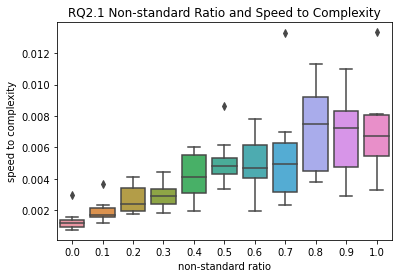

In [167]:
sns.boxplot(x=automation_speed_df['non-standard ratio'], y=automation_speed_df['speed to complexity'])
plt.title('RQ2.1 Non-standard Ratio and Speed to Complexity')
plt.show()

In [168]:
stats.spearmanr(automation_speed_df['non-standard ratio'], automation_speed_df['speed to complexity'], alternative='greater')

SpearmanrResult(correlation=0.7688576003006279, pvalue=5.2428995680879365e-23)

#### RQ2.2

In [169]:
results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        max_complexity = max(simulation_result.loc[(run, )][complexity_measure.lower()])
        results_list.append((i_value, max_complexity))

non_standard_max_complexity_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'max complexity'])
non_standard_max_complexity_df

,non-standard ratio,max complexity
0,0.0,1.437500
1,0.0,1.790000
2,0.0,1.444444
3,0.0,1.630000
4,0.0,1.582011
...,...,...
105,1.0,2.649746
106,1.0,3.010000
107,1.0,2.655000
108,1.0,4.110553


<AxesSubplot:title={'center':'RQ2.2 Non-Standard Ratio and Max Complexity'}, xlabel='non-standard ratio', ylabel='max complexity'>

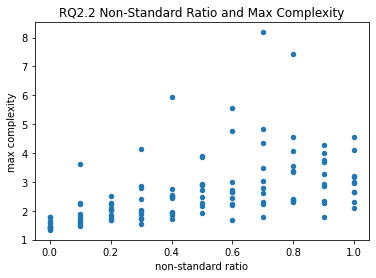

In [170]:
non_standard_max_complexity_df.plot.scatter(x='non-standard ratio', y='max complexity', title='RQ2.2 Non-Standard Ratio and Max Complexity')

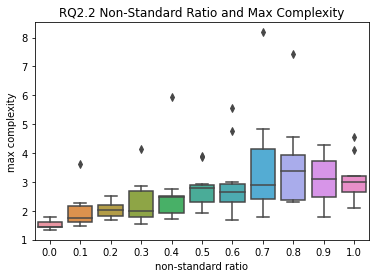

In [171]:
sns.boxplot( x=non_standard_max_complexity_df['non-standard ratio'], y=non_standard_max_complexity_df['max complexity'])
plt.title('RQ2.2 Non-Standard Ratio and Max Complexity')
plt.show()

In [173]:
stats.spearmanr(non_standard_max_complexity_df['non-standard ratio'], non_standard_max_complexity_df['max complexity'], alternative='greater')

SpearmanrResult(correlation=0.6568474710159793, pvalue=3.2978861671708777e-15)

### RQ2 with a = 0

In [190]:
v_h_i = 0.01 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.03 # chance of variation if automized activity if process input is non-standard

a = 0
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [191]:
i_results_path = os.path.join('experiment_results', f'results_i_values_a_{str(int(a * 100)).zfill(3)}.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [192]:
simulation_results[0]

number of nodes  number of connected nodes  number of edges  \
run time                                                                
0   0               200.0                      200.0            199.0   
    50              200.0                      200.0            242.0   
    100             200.0                      200.0            254.0   
    150             200.0                      200.0            273.0   
    200             200.0                      200.0            292.0   
...                   ...                        ...              ...   
9   4750            200.0                        4.0              4.0   
    4800            200.0                        3.0              2.0   
    4850            200.0                        5.0              6.0   
    4900            200.0                        5.0              6.0   
    4950            200.0                        6.0              8.0   

          average degree  control flow complexity  depth   density  \
run time                                                             
0   0           0.995000                    198.0  200.0  0.005000   
    50          1.210000                    199.0   13.0  0.006080   
    100         1.270000                    198.0   11.0  0.006382   
    150         1.365000                    198.0    8.0  0.006859   
    200         1.460000                    199.0   10.0  0.007337   
...                  ...                      ...    ...       ...   
9   4750        1.000000                      3.0    3.0  0.333333   
    4800        0.666667                      1.0    3.0  0.333333   
    4850        1.200000                      4.0    3.0  0.300000   
    4900        1.200000                      5.0    3.0  0.300000   
    4950        1.333333                      6.0    3.0  0.266667   

          est. count shortest simple paths  
run time                                    
0   0                         1.000000e+00  
    50                        2.754229e+03  
    100                       2.511886e+04  
    150                       8.317638e+05  
    200                       2.754229e+07  
...                                    ...  
9   4750                      1.202264e+00  
    4800                      1.000000e+00  
    4850                      1.445440e+00  
    4900                      1.445440e+00  
    4950                      1.737801e+00  

[1000 rows x 8 columns]

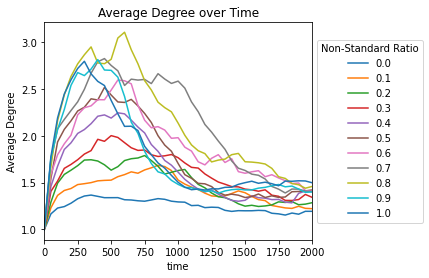

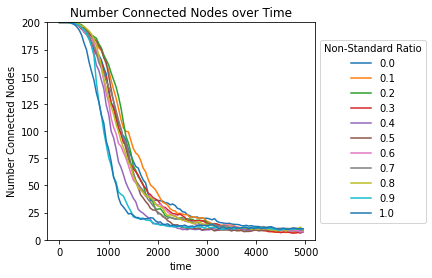

In [160]:
avg_simulation_results = [simulation_result.groupby(level=1).mean() for simulation_result in simulation_results]

# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = complexity_measure.lower(),ax = ax, label = a_value)
ax.set_ylabel(complexity_measure)
ax.set_xlim(0, 2000)
ax.set_title(f"{complexity_measure} over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = 'number of connected nodes', ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

pass

#### RQ2.1

In [164]:
time_to_measure = 250

results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        initial_complexity = simulation_result.loc[(run, 0)][complexity_measure.lower()]
        complexities_after_time = simulation_result.loc[(run, time_to_measure)][complexity_measure.lower()]
        change_of_complexity = complexities_after_time - initial_complexity
        speed_of_change = change_of_complexity / time_to_measure
        
        results_list.append((i_value, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'speed to complexity'])
automation_speed_df

,non-standard ratio,speed to complexity
0,0.0,0.000900
1,0.0,0.002960
2,0.0,0.000820
3,0.0,0.001440
4,0.0,0.001600
...,...,...
105,1.0,0.005820
106,1.0,0.008060
107,1.0,0.006200
108,1.0,0.007960


<AxesSubplot:title={'center':'RQ2.1 Non-Standard Ratio and Speed to Complexity'}, xlabel='non-standard ratio', ylabel='speed to complexity'>

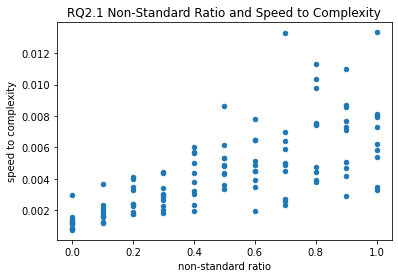

In [166]:
automation_speed_df.plot.scatter(x='non-standard ratio', y='speed to complexity', title='RQ2.1 Non-Standard Ratio and Speed to Complexity')

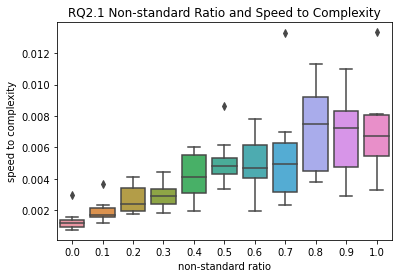

In [167]:
sns.boxplot(x=automation_speed_df['non-standard ratio'], y=automation_speed_df['speed to complexity'])
plt.title('RQ2.1 Non-standard Ratio and Speed to Complexity')
plt.show()

In [168]:
stats.spearmanr(automation_speed_df['non-standard ratio'], automation_speed_df['speed to complexity'], alternative='greater')

SpearmanrResult(correlation=0.7688576003006279, pvalue=5.2428995680879365e-23)

#### RQ2.2

In [169]:
results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        max_complexity = max(simulation_result.loc[(run, )][complexity_measure.lower()])
        results_list.append((i_value, max_complexity))

non_standard_max_complexity_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'max complexity'])
non_standard_max_complexity_df

,non-standard ratio,max complexity
0,0.0,1.437500
1,0.0,1.790000
2,0.0,1.444444
3,0.0,1.630000
4,0.0,1.582011
...,...,...
105,1.0,2.649746
106,1.0,3.010000
107,1.0,2.655000
108,1.0,4.110553


<AxesSubplot:title={'center':'RQ2.2 Non-Standard Ratio and Max Complexity'}, xlabel='non-standard ratio', ylabel='max complexity'>

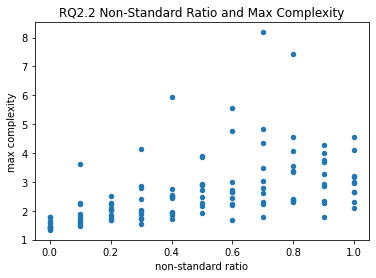

In [170]:
non_standard_max_complexity_df.plot.scatter(x='non-standard ratio', y='max complexity', title='RQ2.2 Non-Standard Ratio and Max Complexity')

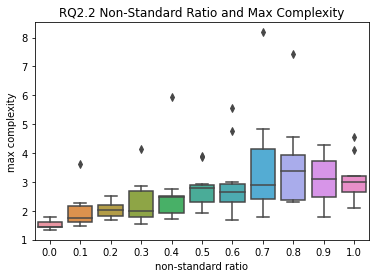

In [171]:
sns.boxplot( x=non_standard_max_complexity_df['non-standard ratio'], y=non_standard_max_complexity_df['max complexity'])
plt.title('RQ2.2 Non-Standard Ratio and Max Complexity')
plt.show()

In [173]:
stats.spearmanr(non_standard_max_complexity_df['non-standard ratio'], non_standard_max_complexity_df['max complexity'], alternative='greater')

SpearmanrResult(correlation=0.6568474710159793, pvalue=3.2978861671708777e-15)

### RQ2 with a = 1

In [193]:
v_h_i = 0.01 # chance of variation for a human actor if process input is non-standard
v_a_i = 0.03 # chance of variation if automized activity if process input is non-standard

a = 1
i_values = [i/experiments for i in range(0, experiments + 1, 1)] # percentage of non-standard case input

In [194]:
i_results_path = os.path.join('experiment_results', f'results_i_values_a_{str(int(a * 100)).zfill(3)}.pkl')

simulation_results = []
if load_results_from_path:
    with open(i_results_path, 'rb') as f:
        simulation_results = pickle.load(f)
else:
    for i in i_values:
        print(i)
        own_process_simulation = process_simulation.ExtendedProcessSimulation(n, l, m, r, a, v_h, v_a, v_h_i, v_a_i, i, max_sequence_length)
        results_df = own_process_simulation.run_experiments(record_am=range(0, n, int(n/100)), number_runs=runs_per_experiment)
        simulation_results.append(results_df)

    # save simulation results to file
    with open(i_results_path, 'wb') as f:
        pickle.dump(simulation_results, f)

In [195]:
simulation_results[0]

number of nodes  number of connected nodes  number of edges  \
run time                                                                
0   0               200.0                      200.0            199.0   
    50              200.0                      200.0            221.0   
    100             200.0                      200.0            224.0   
    150             200.0                      200.0            244.0   
    200             200.0                      200.0            255.0   
...                   ...                        ...              ...   
9   4750            200.0                       30.0             34.0   
    4800            200.0                       29.0             32.0   
    4850            200.0                       29.0             32.0   
    4900            200.0                       29.0             32.0   
    4950            200.0                       29.0             33.0   

          average degree  control flow complexity  depth   density  \
run time                                                             
0   0           0.995000                    198.0  200.0  0.005000   
    50          1.105000                    198.0   21.0  0.005553   
    100         1.120000                    198.0   28.0  0.005628   
    150         1.220000                    198.0   14.0  0.006131   
    200         1.275000                    198.0   13.0  0.006407   
...                  ...                      ...    ...       ...   
9   4750        1.133333                     29.0    8.0  0.039080   
    4800        1.103448                     28.0    9.0  0.039409   
    4850        1.103448                     28.0    8.0  0.039409   
    4900        1.103448                     28.0    5.0  0.039409   
    4950        1.137931                     28.0    8.0  0.040640   

          est. count shortest simple paths  
run time                                    
0   0                             1.000000  
    50                           57.543994  
    100                         100.000000  
    150                        3981.071706  
    200                       30199.517204  
...                                    ...  
9   4750                          2.511886  
    4800                          2.089296  
    4850                          2.089296  
    4900                          2.089296  
    4950                          2.511886  

[1000 rows x 8 columns]

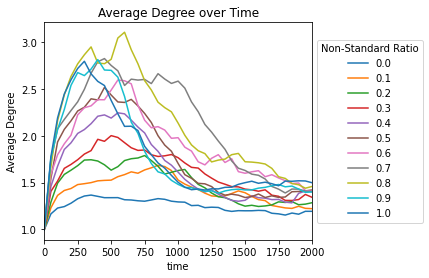

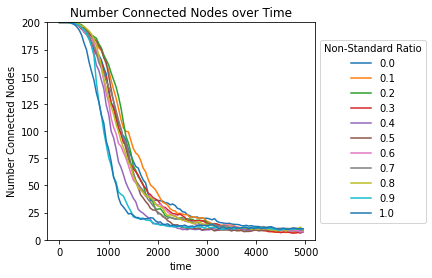

In [160]:
avg_simulation_results = [simulation_result.groupby(level=1).mean() for simulation_result in simulation_results]

# overlay the complexity curve of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = complexity_measure.lower(),ax = ax, label = a_value)
ax.set_ylabel(complexity_measure)
ax.set_xlim(0, 2000)
ax.set_title(f"{complexity_measure} over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

# overlay the number_of_connected_nodes of the graphs
fig, ax = plt.subplots()
for a_value, simulation_result in zip(a_values, avg_simulation_results):
    simulation_result.plot(y = 'number of connected nodes', ax = ax, label = a_value)
ax.set_ylabel("Number Connected Nodes")
ax.set_ylim(0, l)
ax.set_title("Number Connected Nodes over Time")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Non-Standard Ratio')

pass

#### RQ2.1

In [164]:
time_to_measure = 250

results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        initial_complexity = simulation_result.loc[(run, 0)][complexity_measure.lower()]
        complexities_after_time = simulation_result.loc[(run, time_to_measure)][complexity_measure.lower()]
        change_of_complexity = complexities_after_time - initial_complexity
        speed_of_change = change_of_complexity / time_to_measure
        
        results_list.append((i_value, speed_of_change))

automation_speed_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'speed to complexity'])
automation_speed_df

,non-standard ratio,speed to complexity
0,0.0,0.000900
1,0.0,0.002960
2,0.0,0.000820
3,0.0,0.001440
4,0.0,0.001600
...,...,...
105,1.0,0.005820
106,1.0,0.008060
107,1.0,0.006200
108,1.0,0.007960


<AxesSubplot:title={'center':'RQ2.1 Non-Standard Ratio and Speed to Complexity'}, xlabel='non-standard ratio', ylabel='speed to complexity'>

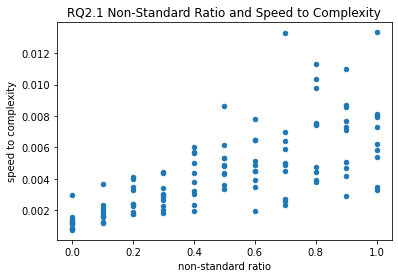

In [166]:
automation_speed_df.plot.scatter(x='non-standard ratio', y='speed to complexity', title='RQ2.1 Non-Standard Ratio and Speed to Complexity')

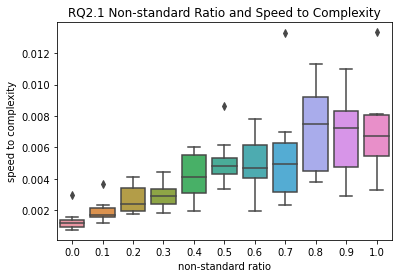

In [167]:
sns.boxplot(x=automation_speed_df['non-standard ratio'], y=automation_speed_df['speed to complexity'])
plt.title('RQ2.1 Non-standard Ratio and Speed to Complexity')
plt.show()

In [168]:
stats.spearmanr(automation_speed_df['non-standard ratio'], automation_speed_df['speed to complexity'], alternative='greater')

SpearmanrResult(correlation=0.7688576003006279, pvalue=5.2428995680879365e-23)

#### RQ2.2

In [169]:
results_list =  []
# compute the speed of growth for the complexity measure until time x
for i_value, simulation_result in zip(i_values, simulation_results):
    for run in np.unique(simulation_results[0].index.get_level_values('run')):     
        max_complexity = max(simulation_result.loc[(run, )][complexity_measure.lower()])
        results_list.append((i_value, max_complexity))

non_standard_max_complexity_df = pd.DataFrame(results_list, columns=['non-standard ratio', 'max complexity'])
non_standard_max_complexity_df

,non-standard ratio,max complexity
0,0.0,1.437500
1,0.0,1.790000
2,0.0,1.444444
3,0.0,1.630000
4,0.0,1.582011
...,...,...
105,1.0,2.649746
106,1.0,3.010000
107,1.0,2.655000
108,1.0,4.110553


<AxesSubplot:title={'center':'RQ2.2 Non-Standard Ratio and Max Complexity'}, xlabel='non-standard ratio', ylabel='max complexity'>

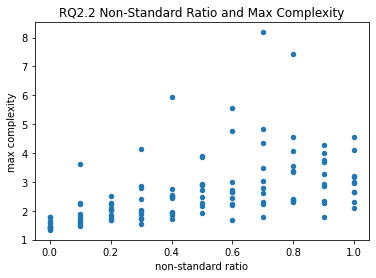

In [170]:
non_standard_max_complexity_df.plot.scatter(x='non-standard ratio', y='max complexity', title='RQ2.2 Non-Standard Ratio and Max Complexity')

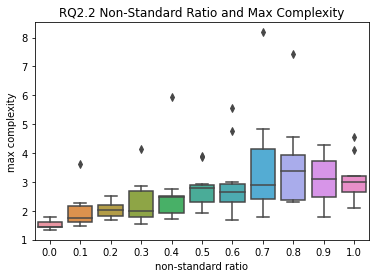

In [171]:
sns.boxplot( x=non_standard_max_complexity_df['non-standard ratio'], y=non_standard_max_complexity_df['max complexity'])
plt.title('RQ2.2 Non-Standard Ratio and Max Complexity')
plt.show()

In [173]:
stats.spearmanr(non_standard_max_complexity_df['non-standard ratio'], non_standard_max_complexity_df['max complexity'], alternative='greater')

SpearmanrResult(correlation=0.6568474710159793, pvalue=3.2978861671708777e-15)